# Implementing K-Nearest Neighbors (KNN) Classifier

Laura Choque

The Iris dataset is a small, well-structured, fully labeled dataset with numerical features and clearly separable classes.
K-Nearest Neighbors (KNN) is particularly suitable in this scenario because it is a distance-based classifier that performs well when class boundaries are simple and the number of features is low.

KNN does not assume any underlying data distribution, hence it is good as an introductory classification

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/1iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print("Dimensión (filas, columnas):", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores faltantes por columna:\n", df.isna().sum())


Dimensión (filas, columnas): (150, 5)

Columnas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Tipos de datos:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Valores faltantes por columna:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Subsequently, we separate X which are feature, vs y : target

In [ ]:
target_col = "species"   # si tu columna se llama distinto, cámbialo

X = df.drop(columns=[target_col])
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nClases en y:", y.unique())


X shape: (150, 4)
y shape: (150,)

Clases en y: ['setosa' 'versicolor' 'virginica']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (120, 4) Test: (30, 4)


Standarscaler es para el KNN que usa distancia

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) #aqui escala y calcula media y desviacion
X_test_scaled = scaler.transform(X_test) #aqui solo escala


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 7)#k pequeo overfitting
knn.fit(X_train_scaled, y_train) #aqui entrena

y_pred = knn.predict(X_test_scaled) #para cada punto calcula distancias

acc = accuracy_score(y_test, y_pred) #aqui calcula cuantas acerto y cuantas no
print("Accuracy:", acc)


Accuracy: 0.9666666666666667


Accuracy vs K plot to analyze model sensitivity

Confusion matrix to identify misclassifications

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
k_values = range(1, 26)
acc_list = []

for k in k_values:#búsqueda manual de hiperparámetros.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc_list.append(accuracy_score(y_test, y_pred))

best_k = k_values[int(np.argmax(acc_list))]
best_acc = max(acc_list)

print("Mejor K:", best_k, "con Accuracy:", best_acc)


Mejor K: 1 con Accuracy: 0.9666666666666667


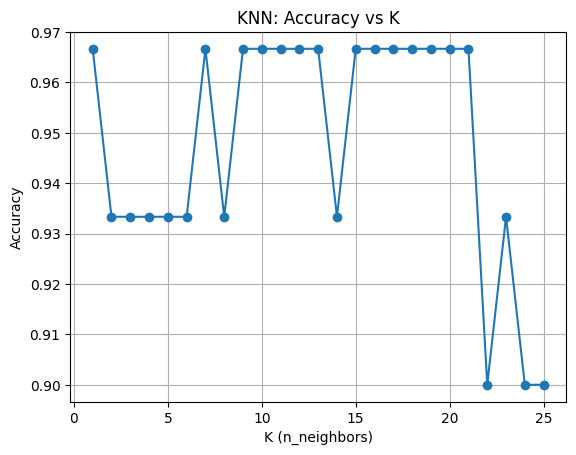

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(k_values), acc_list, marker='o')
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs K")
plt.grid(True)
plt.show()


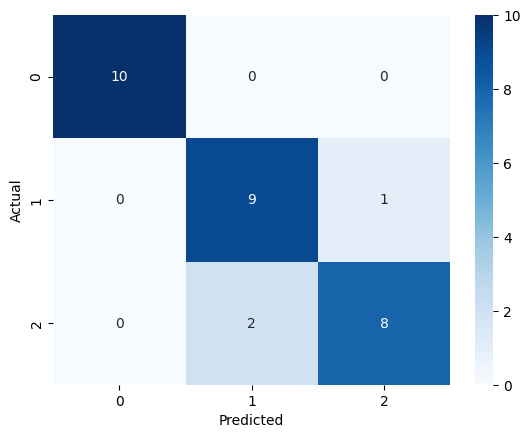

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


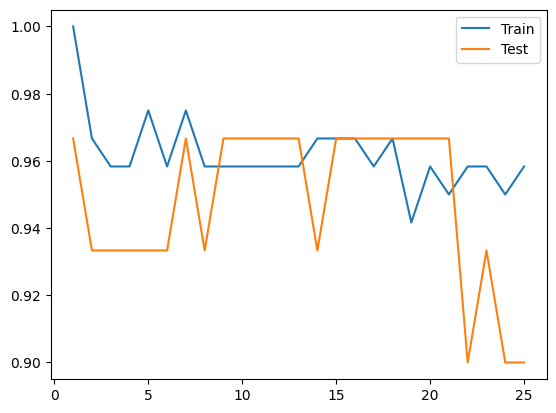

In [ ]:
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_acc.append(
        accuracy_score(y_train, knn.predict(X_train_scaled))
    )
    test_acc.append(
        accuracy_score(y_test, knn.predict(X_test_scaled))
    )

plt.plot(k_values, train_acc, label="Train")
plt.plot(k_values, test_acc, label="Test")
plt.legend()
plt.show()


Eje X → Primera Componente Principal (PC1)

Eje Y → Segunda Componente Principal (PC2)
The PCA projection shows that the setosa class is linearly separable and well isolated in the reduced feature space, while versicolor and virginica exhibit significant overlap. This overlap explains the classification errors observed between these two classes in the confusion matrix and highlights the intrinsic difficulty of the problem

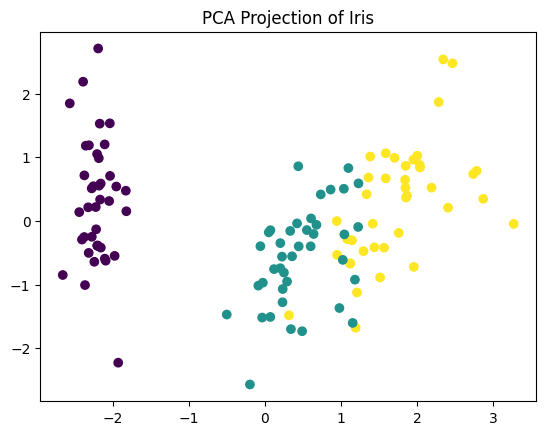

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train.astype('category').cat.codes)
plt.title("PCA Projection of Iris")
plt.show()

